# Housing prices prediction Notebook

## Objectives 
- Business requirement 1:
  - The client wants a statistic model of housing prices across California

---

# Preparation setup

## Import libraies

In [1]:
%pip install -r /workspace/pp5-house-price-prediction 2>/dev/null | grep -v 'Requirement already satisfied'
print('Requirements installed.')

Note: you may need to restart the kernel to use updated packages.
Requirements installed.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Set working directory

In [3]:
current_dir = os.getcwd()
print('Current folder: ' + current_dir)
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print('New folder: ' + current_dir)

Current folder: /workspace/pp5-house-price-prediction/jupyter_notebooks
New folder: /workspace/pp5-house-price-prediction


## Download dataset from kaggle

In [4]:
# Install Kaggle API
%pip install kaggle==1.5.12 2>/dev/null | grep -v 'Requirement already satisfied'
print('Requirements installed.')

# Set Kaggle config directory for authentication
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Make sure kaggle.json file has correct permissions (only if you're using Colab or Jupyter)
!chmod 600 kaggle.json
print('Directory configured and permissions set.')

# Download the dataset
!kaggle datasets download -d camnugent/california-housing-prices



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73027 sha256=aa886c9670ff9c1266cef3d5a3fb0fcb4cc88681b091b448e297d4d78aba65bc
  Stored in directory: /home/gitpod/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
Requirements installed.
chmod: cannot access 'kaggle.json': No such file or directory
Directory configured and permissions set.
Traceback (most recent call last):
  File "/workspace/.pip-modules/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/workspace/.pip-modules/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/workspace/.pip-modules/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find 

---

## Loading dataset

In [5]:

# Load the dataset
data = pd.read_csv("/workspace/pp5-house-price-prediction/housing.csv")

Check the data for any errors

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


---

# Data Exploration

Checking for non-null values

In [7]:
data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

remove all rows with missing values (NaN) from the DataFrame data. The inplace=True part means it modifies the original DataFrame directly without needing to create a new one.

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


X = data.drop(["median_house_value"], axis=1) creates the feature set by removing the target column, and y = data["median_house_value"] defines the target variable for prediction.

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

split the dataset into 80% for training and 20% for testing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17098,-122.25,37.46,33.0,6841.0,950.0,2681.0,980.0,7.1088,NEAR OCEAN,443300.0
5285,-118.46,34.05,25.0,4077.0,1151.0,1719.0,1017.0,3.7721,<1H OCEAN,337500.0
14895,-117.07,32.61,22.0,5016.0,1331.0,3222.0,1196.0,2.1441,NEAR OCEAN,135500.0
8068,-118.18,33.83,45.0,1535.0,274.0,591.0,276.0,4.2411,NEAR OCEAN,371700.0
3232,-119.69,36.25,35.0,2011.0,349.0,970.0,300.0,2.3950,INLAND,94100.0
...,...,...,...,...,...,...,...,...,...,...
5477,-118.45,34.00,46.0,1777.0,362.0,896.0,334.0,4.4500,<1H OCEAN,348300.0
17078,-122.20,37.48,30.0,1170.0,258.0,610.0,243.0,3.4427,NEAR BAY,263500.0
12767,-121.42,38.61,34.0,1126.0,256.0,589.0,243.0,2.1776,INLAND,84400.0
14437,-117.24,32.80,18.0,2205.0,661.0,874.0,580.0,3.8018,NEAR OCEAN,112500.0


create histograms for each numeric column in train_data, with a larger plot size for better visibility.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

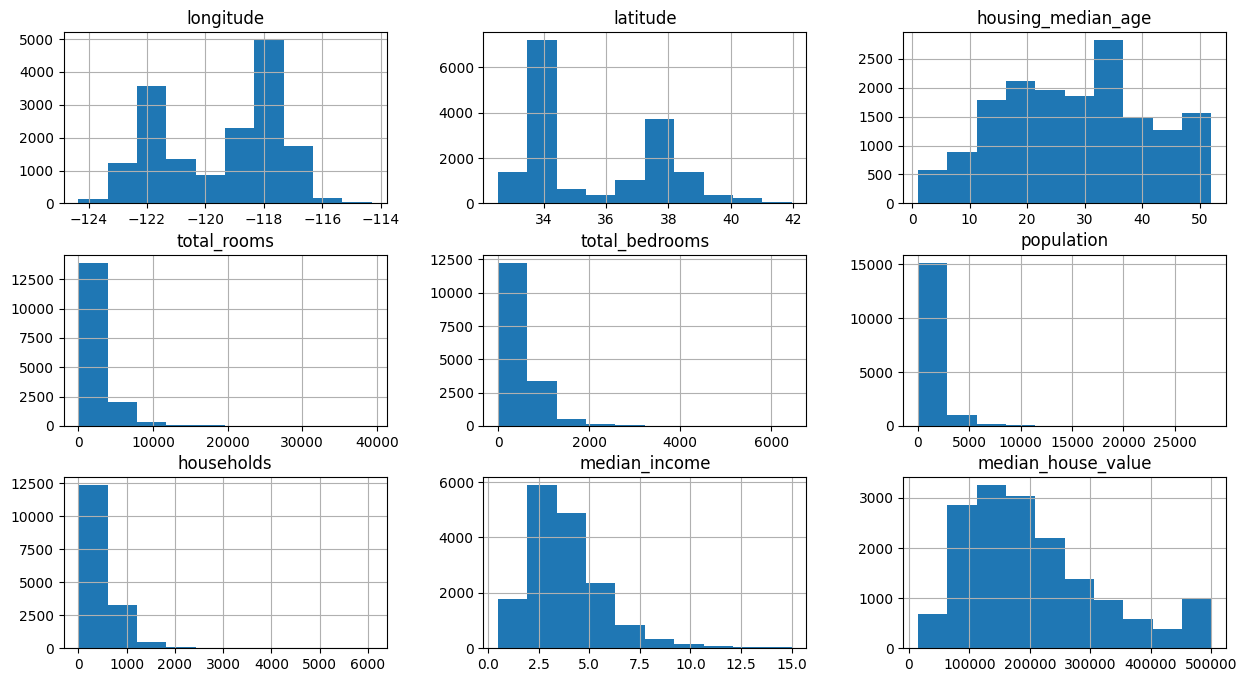

In [14]:
train_data.hist(figsize=(15,8))

This generates a heatmap of the correlation matrix for numeric columns in train_data, with annotations showing the correlation values, using a yellow-green-blue color palette for visualization.

<AxesSubplot:>

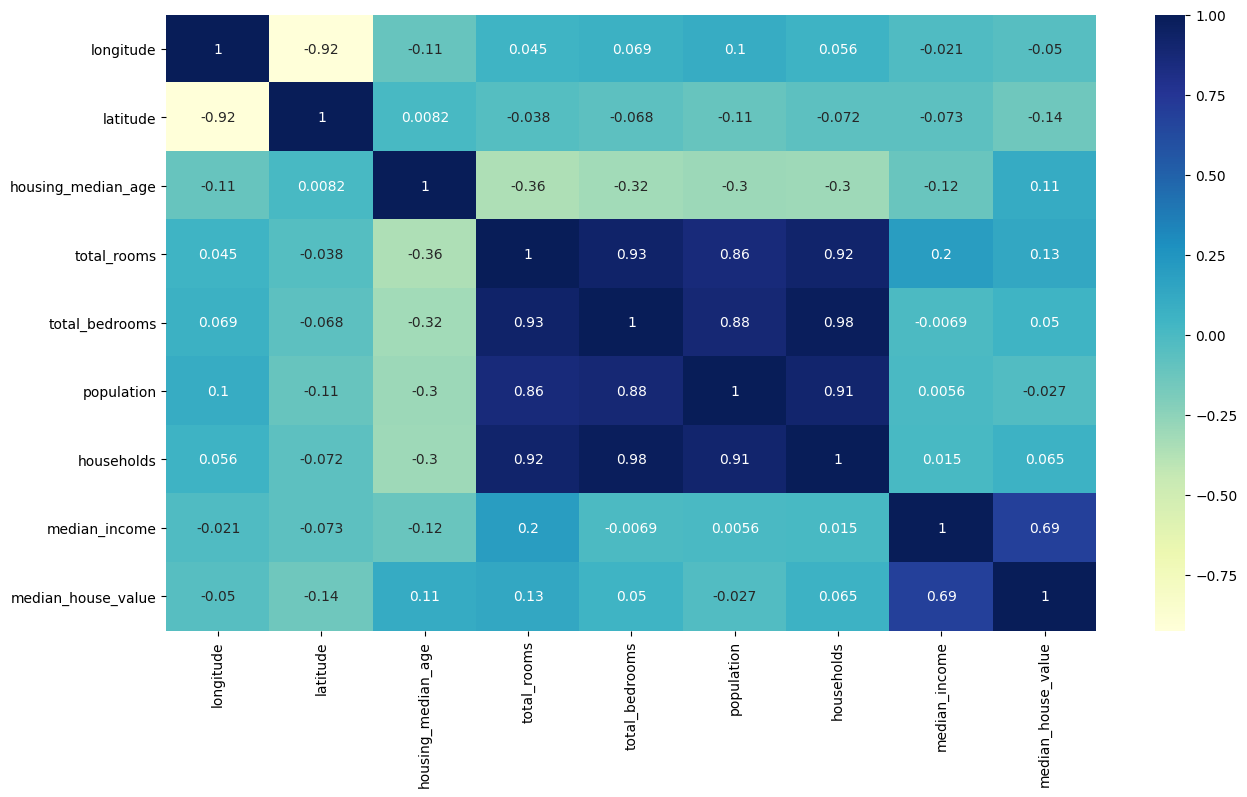

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap ="YlGnBu")

---

# Data Preprocessing

Apply code to a log transformation

In [16]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_rooms"] + 1)
train_data["population"] = np.log(train_data["total_rooms"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

This helps visualize the distribution of the data, such as the frequency of different values in each column.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

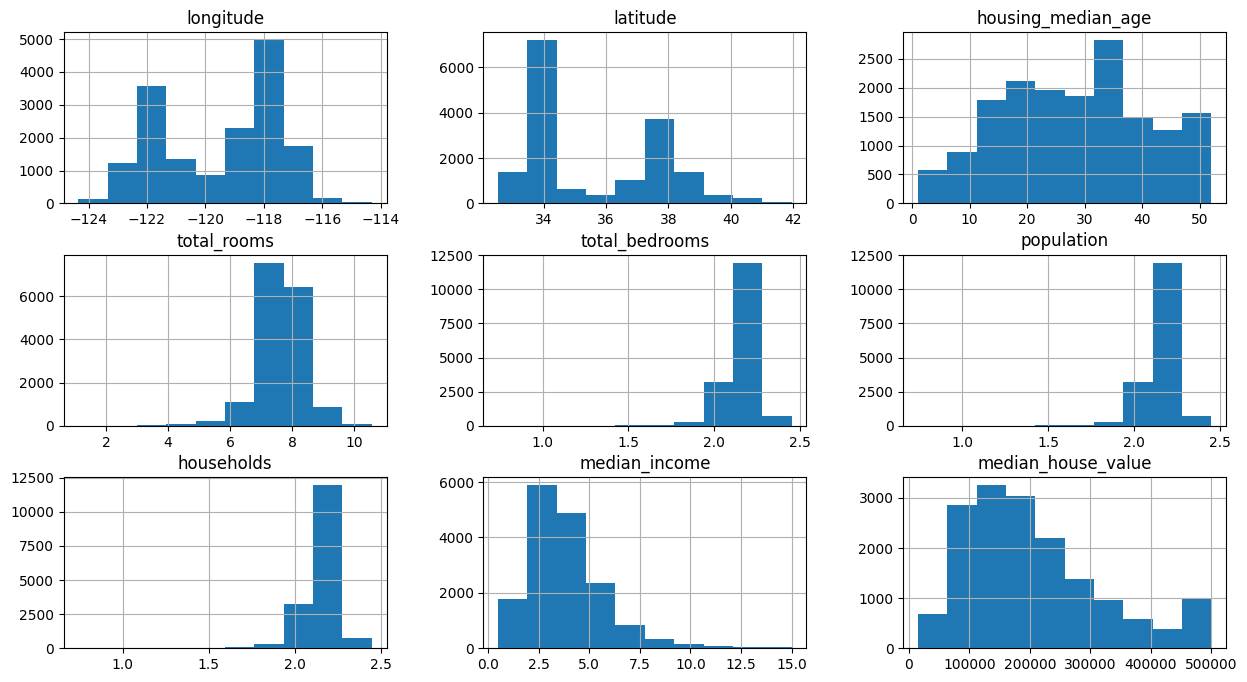

In [17]:
train_data.hist(figsize=(15,8))

 Create dummy variables for the ocean_proximity column, adds them to train_data, and then drops the original ocean_proximity column.

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

Create a heatmap

<AxesSubplot:>

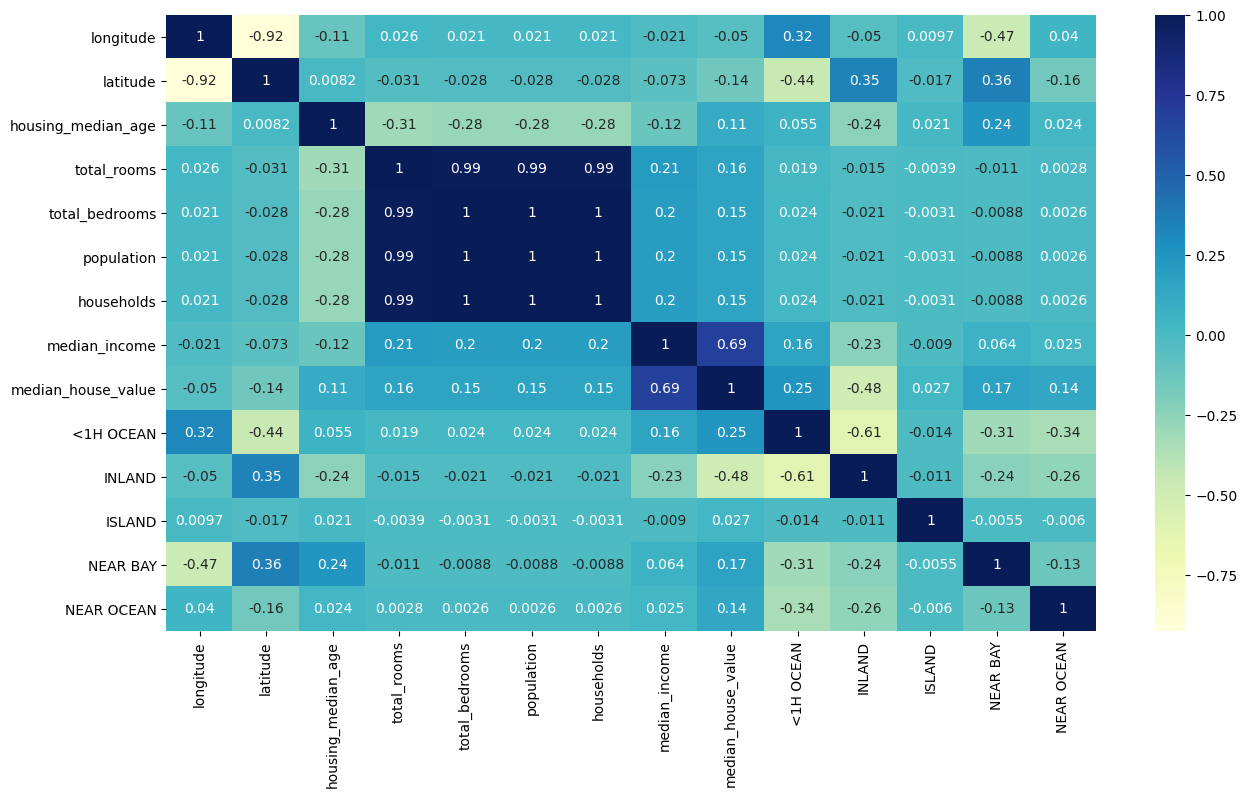

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap ="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

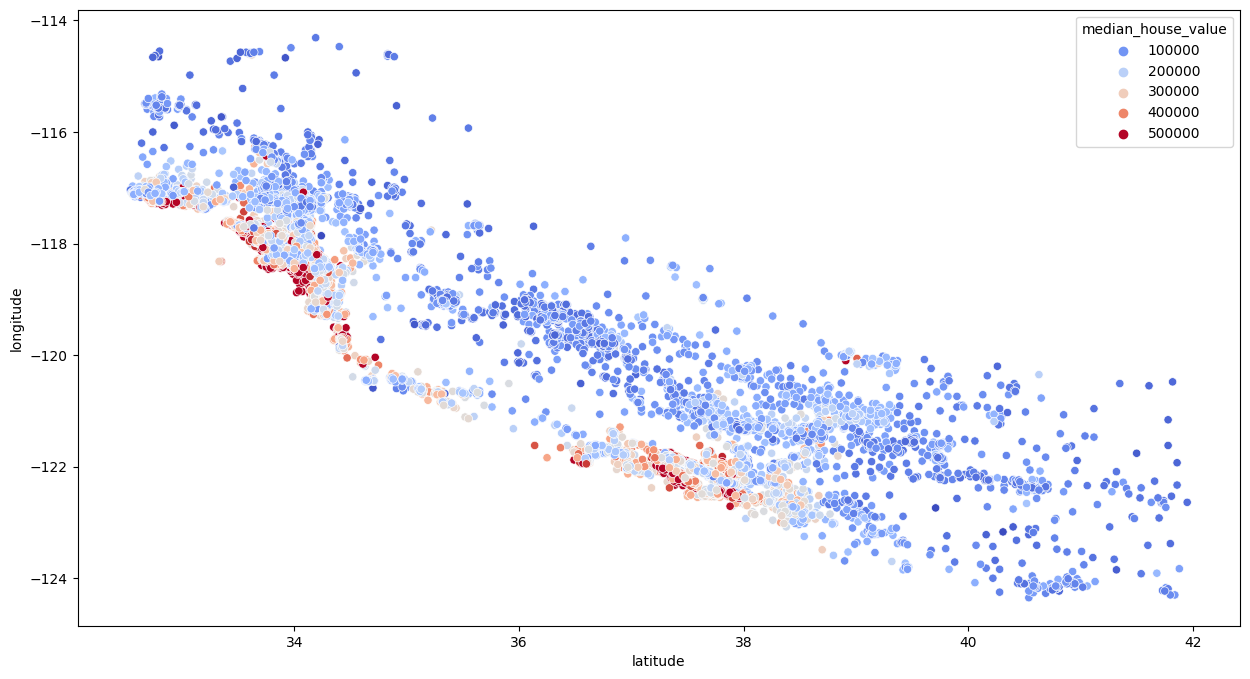

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

---

# Feature engineering

In [21]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

<AxesSubplot:>

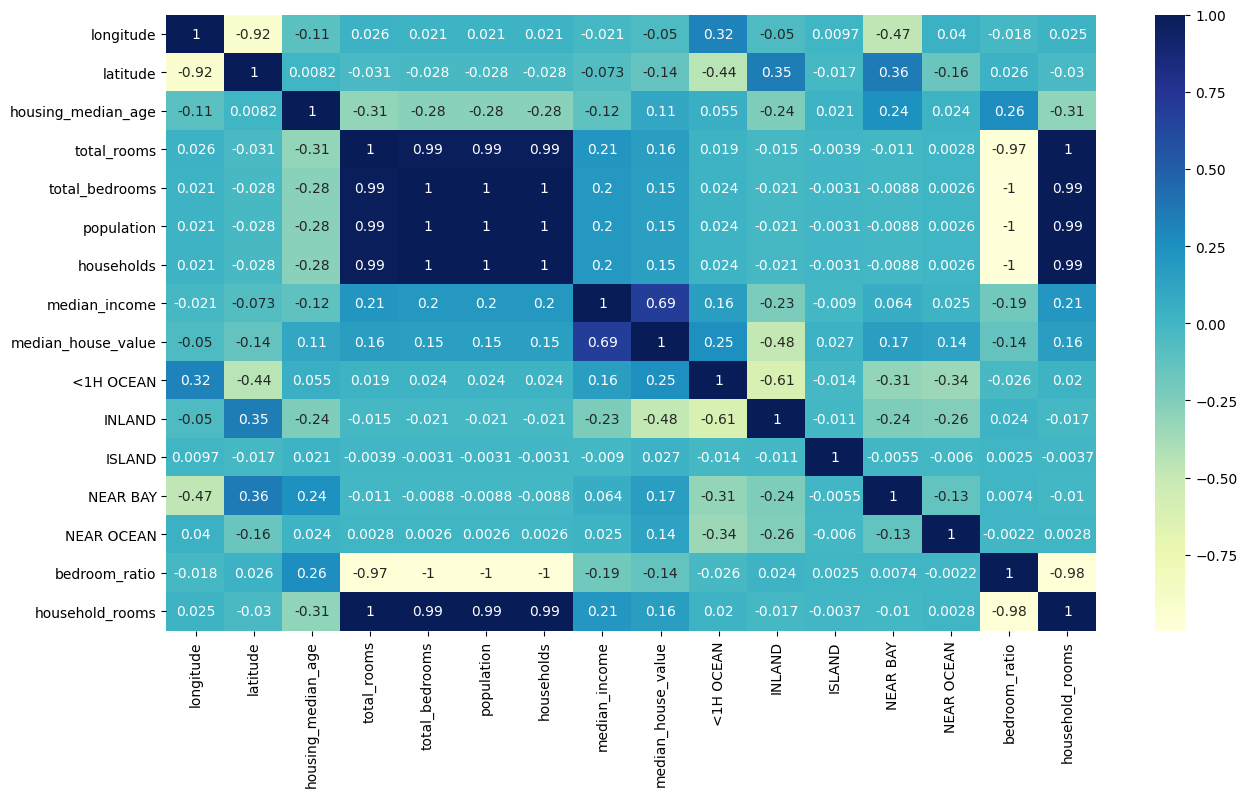

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap ="YlGnBu")

---

# Linear regression model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(["median_house_value"], axis=1), train_data["median_house_value"]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [24]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_rooms"] + 1)
test_data["population"] = np.log(test_data["total_rooms"] + 1)
test_data["households"] = np.log(test_data["total_rooms"] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [25]:
X_test, y_test = test_data.drop(["median_house_value"], axis=1), test_data["median_house_value"]

In [26]:
X_test_s = scaler.transform(X_test)

In [27]:
reg.score(X_test_s, y_test)

0.6069100112865892

---

# Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [29]:
forest.score(X_test_s, y_test)

0.8192234512236828

In [30]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [32]:
import pandas as pd

# Load the data
df = pd.read_csv("/workspace/pp5-house-price-prediction/housing.csv")

# Data Cleaning Steps
# Handle missing values
df.fillna(df.median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert data types if necessary
# Example: df['column_name'] = df['column_name'].astype('int')

# Handle outliers (example: using IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalize/Standardize data if necessary
# Example: df['column_name'] = (df['column_name'] - df['column_name'].mean()) / df['column_name'].std()

# Save the cleaned data to a new CSV file
cleaned_data_path = "/workspace/pp5-house-price-prediction/cleaned_housing.csv"
df.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")

/tmp/ipykernel_18453/4083619881.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)
/tmp/ipykernel_18453/4083619881.py:20: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


Cleaned data saved to /workspace/pp5-house-price-prediction/cleaned_housing.csv
